# First steps with TensorFlow

After spending longer than expected getting TensorFlow to work on my new M1 MacBook Air (I will add some pointers if someone is really interested in saving 8h of his/her life...) I have started the first post on the first steps using TensorFlow (remember that first post... sigh!).

The goal for this first one is to get familiar with the basic methods to define, train and test any deep learning architecture. The main 5 steps in any model life-cycle will be presented using some fairly common problems to introduce the main concepts:
1. **Prediction problem:** House prices (starting with some very unrealistic prices)
1. **Classification problem:** MNIST classification

Finally and as part of those, we will have a deeper look into chosing an optimal number of epochs (loops through the training set), batch size (number of samples in epoch for the loss estimation) and the use of callbacks to early stop training to gain time and avoid overfitting.

Remember that neural networks are very sensitive to the amount of data used for training them; too little and they will underfit, too much of it and they will overfit the data.

Are you ready? Let's dive in!

## The 5-step Model Life-Cycle

A model has a life-cycle and this provides the backbone for modelling a data-set and understanding the tf.keras API.

The 5 steps are:
1. Defining the model
1. Compiling the model
1. Fitting the model
1. Evaluating the model
1. Making predictions


### 1. Defining the model
Defining the model requires picking the type of model to use, then choose the architecture or network topology.

From an API perspective, this requires defining the layers of the model, configuring each layer with a number of nodes and activation functions and connecting the layers together into a cohesive model.

Models can be defined with either the Sequential or Functional APIs.

### 2. Compiling the model
Compiling the model requires that you choose the loss function you want to optimize, such as mean squared error or cross-entropy.

It also requires to chose the algorithm to be used to perform the optimization procedure, in general stochastic gradient descent (SGD) or a modern variation, Adam. It might also require for us to define the performance metrics to track during the model training process.

For a list of supported optmizers, see this:
* [tf.keras Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

```python
# compile the model
opt = SGC(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy')
```

The three most common loss functions are:
* *'binary_crossentropy'* for binary classification.
* *'sparse_categorical_crossentropy'* for multi-class classification.
* *'mse'* (mean squared error) for regression.

```python
# compile the model
model.compile(optimizer='sgd', loss='mse')
```

For a list of supported optmizers, see this:
* [tf.keras Loss Functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
Metrics are defined as a list of strings for known metric functions or a list of functions to call to evaluate predictions.

For a list of all supported metrics:
* [tf.keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

```python
# compile the model
model.compile(optimizer='sgd', loss='binary_accuracy', metrics=['accuracy'])
```

### 3. Fitting the model
Fitting the model requires to select the training configuration, such as the number of epochs (loops through the training set) and the batch size (number of samples in an epoch used to estimate model error).

Training applies the chosen optimization algorithm to minimise the chosen loss function and updates the model using the [backpropagation of error algorithm](https://en.wikipedia.org/wiki/Backpropagation).

Fitting the model is the slow part of the whole process.

```python
...
# fit the model
model.fit(X, y, epochs=100, batch_size=32)
```

### 4. Evaluating the model
To evaluate the model performance, we first need to have reserved some data that is not to be used in training the model, to get an estimate of the model performance in real-ife circumstances and we will assess the MAE, accuracy, or whatever other metric we are trying to optimise for.

```python
...
# evaluate the model
loss = model.evaluate(X, y, verbose=0)
```

### 5. Making a Prediction
Making a preduction is the final step in the life-cycle and, put simple, it is the reason why we wanted the model in the first place.

```python
...
# make a prediction
yhat = model.predict(X)
```

### Final note: Sequential model API or Functional Model API

#### Sequential Model API (Simple)
Recommended when starting. It essentially involves adding layers to a Sequential class, from input to output. One thing to note is that shape of the input layer is defined in the first hidden (or output?) layer.

```python
# example of a model defined using the sequential API
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))
```

For a more complex model with more hidden layers, one would just need to add more Dense layers to the model.

#### Functional Model API (Advanced)
Interesting from a flexibility perspective. It involves connecting the output of one layer into the input of another one. Each connection is specified.

```python
# define the model, starting with the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)
```



## Example 1: Predicting house prices with TensorFlow

Let's imagine we leave in a city where the only factor determining the price of a house is the number of rooms in that particular house (but we don't a priori know that!). We will collect available data for houses for sale, where the only feature is the number of rooms and then the price for that house. It is surely a bit over the top, but... could a simple neural network (in reality, just a single neuron!) be able to accurate predict house prices?

This is obviously a very simplistic example, but it is a great one to showcase the 5-step model life-cycle concepts that we will use with more complex problems.

In [164]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')
%matplotlib inline

In [165]:
# Create the artificially simple data
xs = np.arange(1, 11, dtype=float)
ys = xs * 50 + 5
print(f"Rooms vector: {xs}\nPrices vector: {ys}")

Rooms vector: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Prices vector: [ 55. 105. 155. 205. 255. 305. 355. 405. 455. 505.]


In [166]:
# Remember the 5 steps?...
# Step 1: Define the model
model = Sequential(Dense(units=1, input_shape=[1], activation='linear'))
model.summary()

# Step 2: Compile the model, i.e. what is the loss function (i.e. mse here) and how do we optimise (using sgd)
model.compile(optimizer='sgd', loss='mse')

# Step 3: Fit the model using some training data, number of epochs and batch sizes
model.fit(xs, ys, epochs=400, batch_size=5, verbose=0)

# Step 4: Evaluate the model
mse = np.average((model.predict(xs).transpose() - ys)**2)
loss = model.evaluate(xs, ys, verbose=0)
print(f"\n\nModel evaluation:\nmse of {mse}, or using model.evaluate: {loss}")

# Step 5: Make some predictions!
test_data = [7, 8, 12]
predictions = model.predict(test_data)
print(f"\n\n\nPredictions for {test_data}: {predictions}")

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Model evaluation:
mse of 0.0005954486856353469, or using model.evaluate: 0.0005954486550763249



Predictions for [7, 8, 12]: [[354.99695]
 [404.989  ]
 [604.95734]]


### Effect of number of epochs


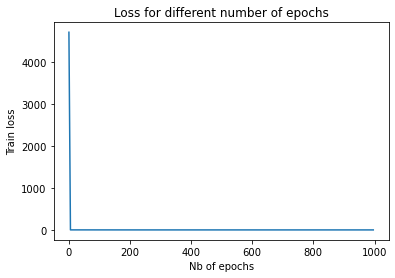

In [167]:
epoch_vector = []
loss_vector = []
for epochs_param in np.arange(1, 1000, 5):
    model = Sequential(Dense(units=tf.constant(1), input_shape=[tf.constant(1)], activation="linear"))
    model.compile(optimizer='sgd', loss='mse')
    epoch_vector.append(epochs_param)
    fitted_model = model.fit(xs, ys, epochs=tf.constant(epochs_param), verbose=0)
    train_loss = model.evaluate(xs, ys, verbose=0)
    loss_vector.append(train_loss)

plt.plot(epoch_vector, loss_vector)
plt.xlabel('Nb of epochs')
plt.ylabel('Train loss')
plt.title('Loss for different number of epochs')
plt.show()

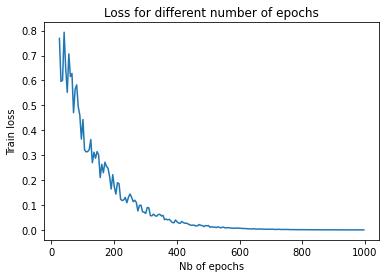

In [168]:
plt.plot(epoch_vector[5:], loss_vector[5:])
plt.xlabel('Nb of epochs')
plt.ylabel('Train loss')
plt.title('Loss for different number of epochs')
plt.show()

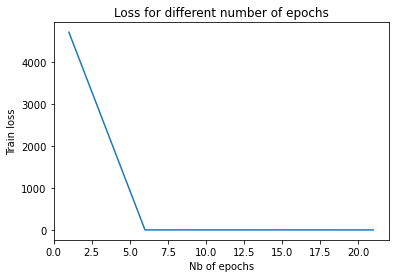

In [172]:
plt.plot(epoch_vector[0:5], loss_vector[0:5])
plt.xlabel('Nb of epochs')
plt.ylabel('Train loss')
plt.title('Loss for different number of epochs')
plt.show()

### Effect of batch size

In [173]:
batch_vector = []
loss_vector = []
for batch_size_param in np.arange(1, 100, 2):
    model = Sequential(Dense(units=1, input_shape=[1], activation='linear'))
    model.compile(optimizer='sgd', loss='mse')
    batch_vector.append(batch_size_param)
    fitted_model = model.fit(xs, ys, epochs=400, batch_size=batch_size_param, verbose=0)
    train_loss = model.evaluate(xs, ys, verbose=0)
    loss_vector.append(train_loss)

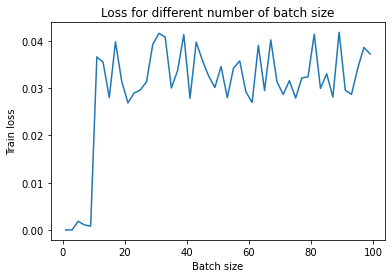

In [174]:
plt.plot(batch_vector, loss_vector)
plt.xlabel('Batch size')
plt.ylabel('Train loss')
plt.title('Loss for different number of batch size')
plt.show()

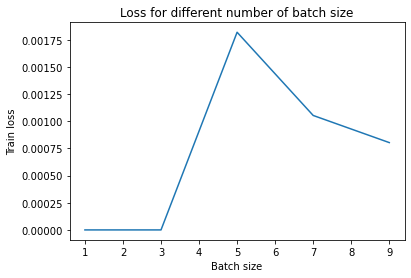

In [175]:
plt.plot(batch_vector[:5], loss_vector[:5])
plt.xlabel('Batch size')
plt.ylabel('Train loss')
plt.title('Loss for different number of batch size')
plt.show()

## Example 2: MNIST data set, classifying handwritten numbers

In this example, we will have a look at the [MNIST Database](https://en.wikipedia.org/wiki/MNIST_database) and define, compile, train, evaluate and finally, make predictions using different architectures of Feed Forward NNs and [CNNs or ConvNets](https://en.wikipedia.org/wiki/Convolutional_neural_network).

Finally, we will introduce the concept of Early Stopping and how it will help us prevent overfitting our neural nets. Are you ready? Here we go!

As we have discussed in previous examples, we will first load the data and prepare it to be processed, by splitting it into training and test sets. Once, that is done, we will go through the usual 5 steps:
1. Model definition
1. Compilation
1. Training / Data fitting
1. Evaluation
1. Prediction

In [176]:
from tensorflow.keras.layers import Flatten, Dense

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
training_images = training_images / 255.0
test_images = test_images / 255.0

In [177]:
# Step 1: Model definition
nn_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(10)
])

# Step 2: Compilation
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
nn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

At this stage we have a fully opperative Neural Network, but given that it has not been trained yet, should expect a prediction accuracy of just around 10%. We can try making some predictions now, to then compare the accuracy in both the training and testing set after fitting.

In [178]:
train_loss, train_acc = nn_model.evaluate(training_images, training_labels)
print(f"Test Loss: {train_loss}, test accuracy: {train_acc}")

1875/1875 [==============================] - 1s 247us/step - loss: 2.3971 - accuracy: 0.0858
Test Loss: 2.398622512817383, test accuracy: 0.08474999666213989


In [179]:
# Step 3: Fitting
nn_model.fit(training_images, training_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 1s - loss: 0.2259 - accuracy: 0.9347
Epoch 2/10
1875/1875 - 1s - loss: 0.0918 - accuracy: 0.9724
Epoch 3/10
1875/1875 - 1s - loss: 0.0627 - accuracy: 0.9810
Epoch 4/10
1875/1875 - 1s - loss: 0.0449 - accuracy: 0.9855
Epoch 5/10
1875/1875 - 1s - loss: 0.0322 - accuracy: 0.9900
Epoch 6/10
1875/1875 - 1s - loss: 0.0253 - accuracy: 0.9921
Epoch 7/10
1875/1875 - 1s - loss: 0.0198 - accuracy: 0.9936
Epoch 8/10
1875/1875 - 1s - loss: 0.0161 - accuracy: 0.9945
Epoch 9/10
1875/1875 - 1s - loss: 0.0126 - accuracy: 0.9959
Epoch 10/10
1875/1875 - 1s - loss: 0.0122 - accuracy: 0.9959


After training the neural network, we would expect to have a much better accuracy that in the previous "random" prediction. Indeed, accuracy of above 95%+ is to be expected!

In [180]:
# Step 4: Evaluation
test_loss, test_acc = nn_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, test accuracy: {test_acc}")

313/313 [==============================] - 0s 382us/step - loss: 0.0700 - accuracy: 0.9820
Test Loss: 0.07004231214523315, test accuracy: 0.9819999933242798


Predicted: 9, result 9
Prediction vector: [[1.4306561e-08 1.6760513e-09 4.9567284e-08 2.3817622e-06 2.2613916e-03
  2.8900930e-08 1.6114517e-10 1.2703968e-06 4.8028607e-08 9.9773479e-01]]


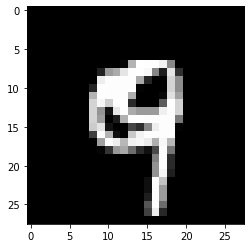

In [181]:
# Step 5: Prediction
probability_model = Sequential([nn_model, tf.keras.layers.Softmax()])
image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='gray')
prediction = probability_model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(f"Predicted: {np.argmax(prediction)}, result {test_labels[image_index]}")
print(f"Prediction vector: {prediction}")

### Convolutional Neural Networks

In the previous example, we used a simple Neural Network to recognise handwritten characters. As we saw, we seem to do fairly well in terms of accuracy. Another alternative to simple NNs for image recognition is to use two techniques, borrowed from biology and to a certain extent, signal recognition, *convolution* and *pooling*. These two will will upgrade our model from a humble Multi-Layer Perceptron to a trendy ConvNet.

#### Convolution
A convolution layer is the cornerstone of a Convolutional Neural Net. The layer consists of  a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the filter entries and the input, producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input.

#### Pooling
Pooling is a form of non-linear downsampling. Pooling allows us to reducing dimensionality (reducing complexity, amount of computation, overfitting, ...) by summarising partitions of the input. For example, in the case of a 2x2 max-pooling layer with a stride of 2, the pixels in a 4x4 matrix will be grouped in 4 smaller partitions of size 2x2, hence discarding 75% of the activations.

In [184]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

training_images_reshaped = training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images_reshaped = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10))

print(cnn_model.summary())

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
cnn_model.fit(training_images_reshaped, training_labels, epochs=10, verbose=2)
test_loss, test_acc = cnn_model.evaluate(test_images_reshaped, test_labels)
print(f"Test Loss: {test_loss}, test accuracy: {test_acc}")

Model: "sequential_384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_116 (Flatten)        (None, 576)               0         
_________________________________________________________________
dense_483 (Dense)            (None, 64)             

Predicted: 9, result 9
Prediction vector: [[1.1563310e-09 5.0442005e-11 1.6174324e-10 3.9292686e-10 1.9350280e-05
  3.6754395e-11 2.0179853e-11 1.5409244e-08 9.9527006e-07 9.9997962e-01]]


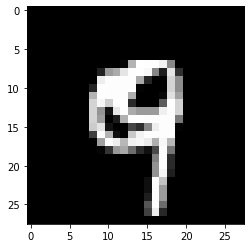

In [183]:
probability_model = Sequential([cnn_model, tf.keras.layers.Softmax()])
image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='gray')
prediction = probability_model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(f"Predicted: {np.argmax(prediction)}, result {test_labels[image_index]}")
print(f"Prediction vector: {prediction}")

### Early stopping in training


Training for 1 epochs
313/313 [==============================] - 0s 361us/step - loss: 0.1145 - accuracy: 0.9664
Training for 2 epochs
313/313 [==============================] - 0s 359us/step - loss: 0.0842 - accuracy: 0.9743
Training for 3 epochs
313/313 [==============================] - 0s 386us/step - loss: 0.0738 - accuracy: 0.9760
Training for 4 epochs
313/313 [==============================] - 0s 364us/step - loss: 0.0684 - accuracy: 0.9795
Training for 5 epochs
313/313 [==============================] - 0s 360us/step - loss: 0.0616 - accuracy: 0.9803
Training for 6 epochs
313/313 [==============================] - 0s 358us/step - loss: 0.0636 - accuracy: 0.9805
Training for 7 epochs
313/313 [==============================] - 0s 378us/step - loss: 0.0672 - accuracy: 0.9822
Training for 8 epochs
313/313 [==============================] - 0s 358us/step - loss: 0.0770 - accuracy: 0.9796
Training for 9 epochs
313/313 [==============================] - 0s 371us/step - loss: 0.0959 - 

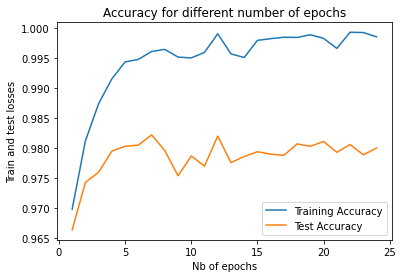

In [185]:
epoch_vector = []
train_acc_vector = []
test_acc_vector = []

def get_basic_model():
    basic_model = Sequential([
        Flatten(input_shape=(28, 28)), 
        Dense(256, activation='relu'), 
        Dense(10)
    ])
    return basic_model

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

for epochs_param in np.arange(1, 25, 1):
    print(f"Training for {epochs_param} epochs")
    model = get_basic_model()
    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
    model.fit(training_images, training_labels, epochs=tf.constant(epochs_param), verbose=0)
    train_loss, train_acc = model.evaluate(training_images, training_labels)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    epoch_vector.append(epochs_param)
    train_acc_vector.append(train_acc)
    test_acc_vector.append(test_acc)

plt.plot(epoch_vector, train_acc_vector, label="Training Accuracy")
plt.plot(epoch_vector, test_acc_vector, label="Test Accuracy")
plt.xlabel('Nb of epochs')
plt.ylabel('Train and test losses')
plt.title('Accuracy for different number of epochs')
plt.legend()
plt.show()

#### Implementing Early Stop with Callbacks


In [186]:
from tensorflow.keras.callbacks import Callback

ACCURACY_THRESHOLD = 0.99

class AccuracyStopCallback(Callback):

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy', 0) > ACCURACY_THRESHOLD):
            print(f"\nReached {ACCURACY_THRESHOLD * 100}% accuracy, stopping training!")
            self.model.stop_training = True
        return

callback = AccuracyStopCallback()
basic_model = get_basic_model()
basic_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
basic_model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks], verbose=2)
test_loss, test_acc = basic_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, test accuracy: {test_acc}")

Epoch 1/10
1875/1875 - 1s - loss: 0.2331 - accuracy: 0.9324
{'loss': 0.23307116329669952, 'accuracy': 0.9323833584785461}
Epoch 2/10
1875/1875 - 1s - loss: 0.0935 - accuracy: 0.9723
{'loss': 0.09354425966739655, 'accuracy': 0.9723166823387146}
Epoch 3/10
1875/1875 - 1s - loss: 0.0621 - accuracy: 0.9809
{'loss': 0.06210039556026459, 'accuracy': 0.98089998960495}
Epoch 4/10
1875/1875 - 1s - loss: 0.0444 - accuracy: 0.9861
{'loss': 0.044377394020557404, 'accuracy': 0.986050009727478}
Epoch 5/10
1875/1875 - 1s - loss: 0.0332 - accuracy: 0.9891
{'loss': 0.03324302285909653, 'accuracy': 0.9891499876976013}
Epoch 6/10
1875/1875 - 1s - loss: 0.0245 - accuracy: 0.9924
{'loss': 0.024505577981472015, 'accuracy': 0.9923666715621948}
Epoch 7/10
1875/1875 - 1s - loss: 0.0201 - accuracy: 0.9936
{'loss': 0.02011692523956299, 'accuracy': 0.9936000108718872}
Epoch 8/10
1875/1875 - 1s - loss: 0.0153 - accuracy: 0.9952
{'loss': 0.015308535657823086, 'accuracy': 0.9951666593551636}

Reached 99.5% accuracy,

## Conclusions

In this post we have had our first introduction to TensorFlow and we have built our first models to predict housing prices and to classify digits in images from the well-known MNIST dataset.

We have established our 5-steps framework to define a new architecture from scratch, to compile it, providing an optimizer and a loss function; we have then fitted the NN to the training set data and finally checked the performance of the model and made some predictions. We have also checked the impact of certain metaparameters, as the number of epochs or the batch size. 

We have presented 2 different architectures for classificating images and had our first interaction with Conv2D and Pooling layers (we will spend more time on those in coming posts).

Finally, we have introduced the concept of Early Stopping, a simple way of preventing our neural network to overfit the training data and to speed up the fitting process. 